<a href="https://colab.research.google.com/github/TrBn17/Obstacle-Detection/blob/main/Obstacle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RKUwy3BX169F6mrZUe3i")
project = rf.workspace("my-xinh-z1bpm").project("blind-ggnd8")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


In [ ]:
import os

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Build model with YOLO

In [ ]:
model = YOLO('/content/drive/MyDrive/DATA/yolov8n.pt')

In [ ]:
 results = model.train(data="/content/Blind-1/data.yaml",epochs=100)

New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DATA/yolov8n.pt, data=/content/Blind-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize

In [ ]:
results2 = model.train(
    data="/content/Blind-1/data.yaml",     # Path to the dataset configuration file
    epochs=100,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device='cpu',            # Set device to CPU
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)

New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DATA/yolov8n.pt, data=/content/Blind-1/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=0, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=

In [ ]:
!cp -r /content/runs /content/drive/My\ Drive/Colab\ Notebooks/

Results visualization

In [ ]:
import pandas as pd
results = pd.read_csv('/content/runs/detect/train2/results.csv')
results2 = pd.read_csv('/content/runs/detect/train3/results.csv')

In [ ]:
results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.3316,3.7834,2.0923,0.01225,0.35000,0.14617,0.06077,1.7876,3.8237,1.7088,0.000011,0.000011,0.000011
1,2,2.3581,3.6900,2.1584,0.01376,0.35000,0.10886,0.05295,1.7722,3.8282,1.6786,0.000033,0.000033,0.000033
2,3,2.4745,3.7061,2.2784,0.01487,0.35000,0.10365,0.05818,1.7355,3.8238,1.6538,0.000054,0.000054,0.000054
3,4,2.3623,3.7336,2.1028,0.01669,0.35000,0.11764,0.06104,1.7295,3.8430,1.6788,0.000075,0.000075,0.000075
4,5,2.2642,3.7801,2.0454,0.01447,0.33750,0.13390,0.06673,1.6920,3.8709,1.6565,0.000096,0.000096,0.000096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,1.4531,1.3796,1.4409,0.58431,0.35893,0.39002,0.17940,2.3970,2.7266,2.5568,0.000286,0.000286,0.000286
77,78,1.4593,1.4457,1.4303,0.60236,0.35762,0.37116,0.17590,2.4003,2.4902,2.5488,0.000275,0.000275,0.000275
78,79,1.3669,1.3869,1.4281,0.60236,0.35762,0.37116,0.17590,2.4003,2.4902,2.5488,0.000264,0.000264,0.000264
79,80,1.4325,1.3818,1.4169,0.58023,0.35629,0.36991,0.17268,2.3678,2.3524,2.4995,0.000253,0.000253,0.000253


In [ ]:
results2

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.6932,1.9169,1.6697,0.46339,0.25987,0.32742,0.17543,2.4386,2.8626,2.3832,0.000000,0.000000,0.000000
1,2,1.7970,2.0197,1.7087,0.38016,0.26071,0.33025,0.17635,2.4303,2.8318,2.3900,0.000011,0.000011,0.000011
2,3,1.7714,2.1232,1.6714,0.40032,0.26726,0.34539,0.17834,2.4368,2.8244,2.3987,0.000022,0.000022,0.000022
3,4,1.7055,1.9781,1.6578,0.43561,0.28690,0.35628,0.16884,2.4787,2.7966,2.4074,0.000032,0.000032,0.000032
4,5,1.5708,1.8169,1.5709,0.46471,0.33100,0.36099,0.16650,2.5307,2.7904,2.4536,0.000043,0.000043,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,1.2603,1.1873,1.3389,0.32409,0.25333,0.34435,0.13897,2.3027,2.8180,2.4011,0.000308,0.000308,0.000308
59,60,1.2503,1.2211,1.3357,0.39582,0.32334,0.34632,0.12166,2.2687,2.7444,2.3685,0.000307,0.000307,0.000307
60,61,1.2387,1.1916,1.3213,0.39582,0.32334,0.34632,0.12166,2.2687,2.7444,2.3685,0.000307,0.000307,0.000307
61,62,1.2028,1.1770,1.2575,0.37992,0.35181,0.35319,0.12752,2.2582,2.6965,2.3470,0.000306,0.000306,0.000306


In [ ]:
results.columns

Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

In [ ]:
results.columns = results.columns.str.strip()
results2.columns = results2.columns.str.strip()
results2.columns

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

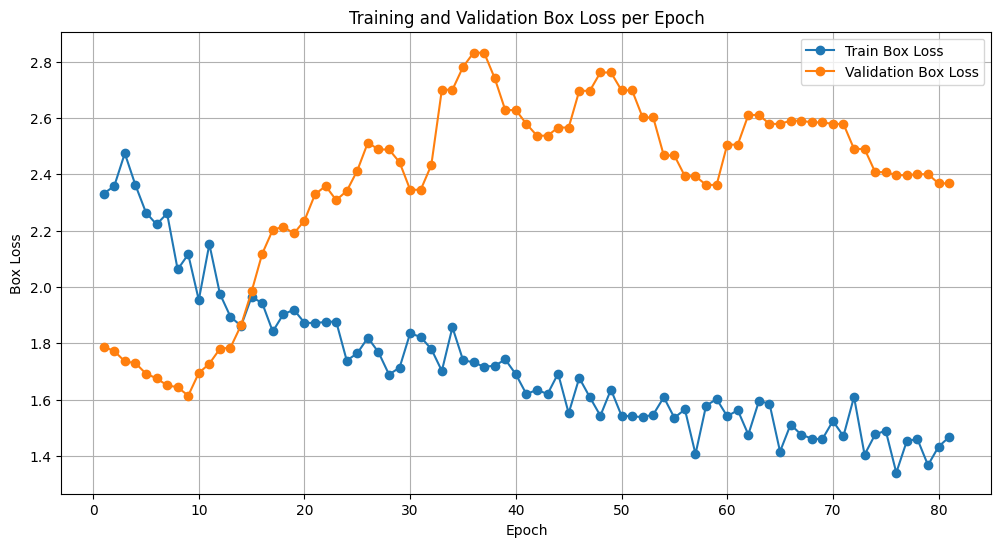

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss', marker='o')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', marker='o')
plt.title('Training and Validation Box Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision', marker='o')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall', marker='o')
plt.title('Precision and Recall per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

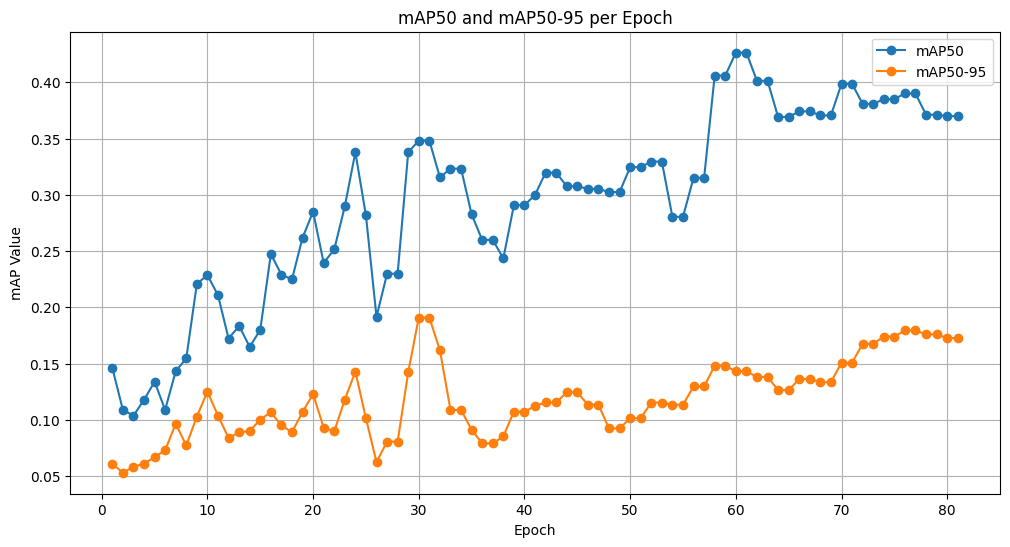

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP50', marker='o')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP50-95', marker='o')
plt.title('mAP50 and mAP50-95 per Epoch')
plt.xlabel('Epoch')
plt.ylabel('mAP Value')
plt.legend()
plt.grid(True)
plt.show()


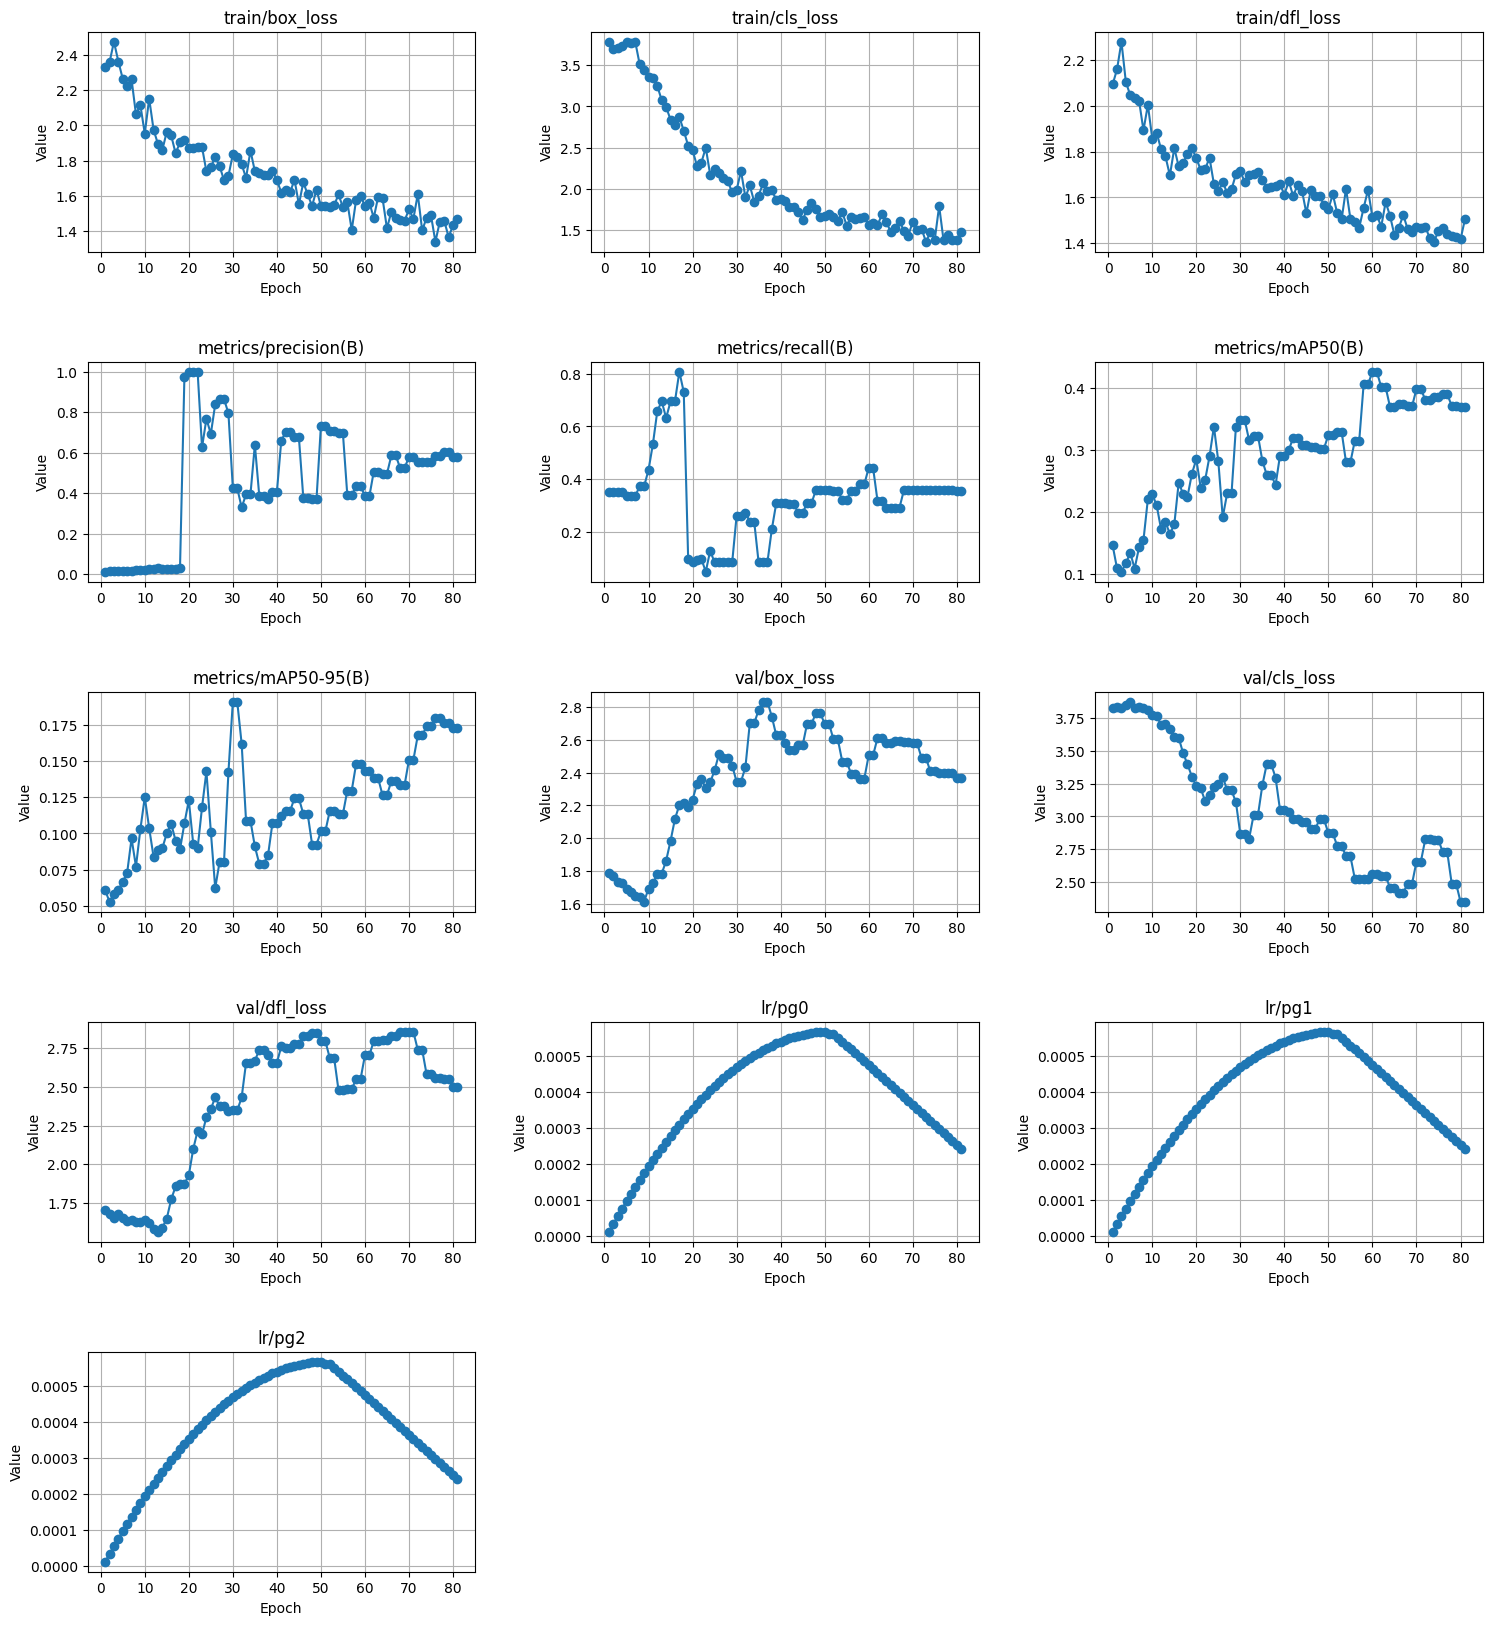

In [ ]:
n_cols = 3
n_rows = (len(results.columns) - 1 + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(results.columns[1:]):
    axes[i].plot(results['epoch'], results[col], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()


In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" source="/content/Blind-1/train/images"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/21 /content/Blind-1/train/images/z5433342827151_daf9dfabc45d591f306c53ca4111d3be_jpg.rf.446b1d64ecf4a8771c3d8e4822785bce.jpg: 640x640 40 trees, 280.4ms
image 2/21 /content/Blind-1/train/images/z5433342827151_daf9dfabc45d591f306c53ca4111d3be_jpg.rf.6fa43e2dd40d9c1850ebc92c3ea64eef.jpg: 640x640 16 trees, 227.1ms
image 3/21 /content/Blind-1/train/images/z5433342827151_daf9dfabc45d591f306c53ca4111d3be_jpg.rf.feb55bdb4cc0b91d4c164349b94b2143.jpg: 640x640 21 trees, 194.0ms
image 4/21 /content/Blind-1/train/images/z5433346600544_cc2bde4c3f39c24e6c750d9b76448100_jpg.rf.15c207b60da7936da5c8b9b21463c3e0.jpg: 640x640 1 car, 2 pits, 5 trees, 201.8ms
image 5/21 /content/Blind-1/train/images/z5433346600544_cc2bde4c3f39c24e6c750d9b76448100_jpg.rf.d6829aad3eacb5e81456911345e2210b.jpg: 640x640 2 barriers, 1 tree, 191.7ms
image 6/21 

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" source="/content/Blind-1/train/images"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/21 /content/Blind-1/train/images/z5433342827151_daf9dfabc45d591f306c53ca4111d3be_jpg.rf.446b1d64ecf4a8771c3d8e4822785bce.jpg: 640x640 3 trees, 277.9ms
image 2/21 /content/Blind-1/train/images/z5433342827151_daf9dfabc45d591f306c53ca4111d3be_jpg.rf.6fa43e2dd40d9c1850ebc92c3ea64eef.jpg: 640x640 1 car, 14 trees, 231.9ms
image 3/21 /content/Blind-1/train/images/z5433342827151_daf9dfabc45d591f306c53ca4111d3be_jpg.rf.feb55bdb4cc0b91d4c164349b94b2143.jpg: 640x640 1 car, 21 trees, 188.4ms
image 4/21 /content/Blind-1/train/images/z5433346600544_cc2bde4c3f39c24e6c750d9b76448100_jpg.rf.15c207b60da7936da5c8b9b21463c3e0.jpg: 640x640 1 car, 1 pit, 3 trees, 204.6ms
image 5/21 /content/Blind-1/train/images/z5433346600544_cc2bde4c3f39c24e6c750d9b76448100_jpg.rf.d6829aad3eacb5e81456911345e2210b.jpg: 640x640 1 barrier, 1 pit, 201.3ms
i

Some of results from the first train

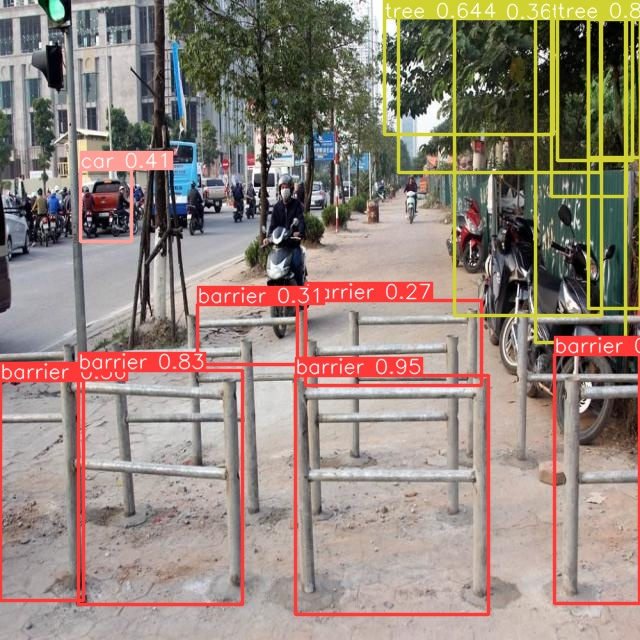

In [ ]:
from IPython.display import Image, display
display(Image('/content/runs/detect/predict/z5433385250783_1901c22cbd0af1f3ca9836a85ac3b306_jpg.rf.9a7400645197ace704d224bdafa0b212.jpg'))


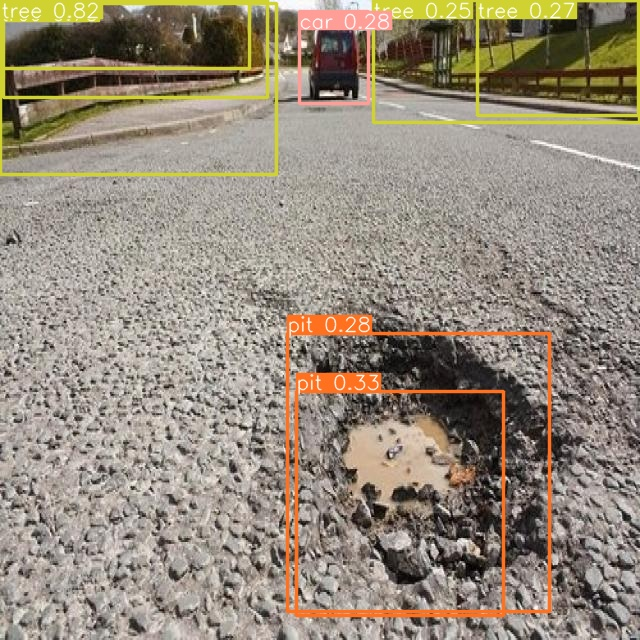

In [ ]:
display(Image('/content/runs/detect/predict/z5433346600544_cc2bde4c3f39c24e6c750d9b76448100_jpg.rf.15c207b60da7936da5c8b9b21463c3e0.jpg'))

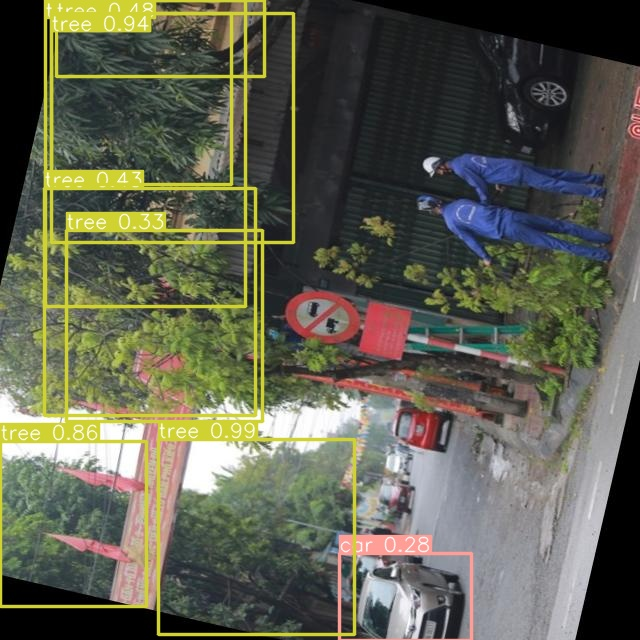

In [ ]:
display(Image('/content/runs/detect/predict/z5433393759004_9cdfdc64313ec3989b51d33e7b955520-1-_jpg.rf.1447e32eb9072a553833fb7d64611533.jpg'))

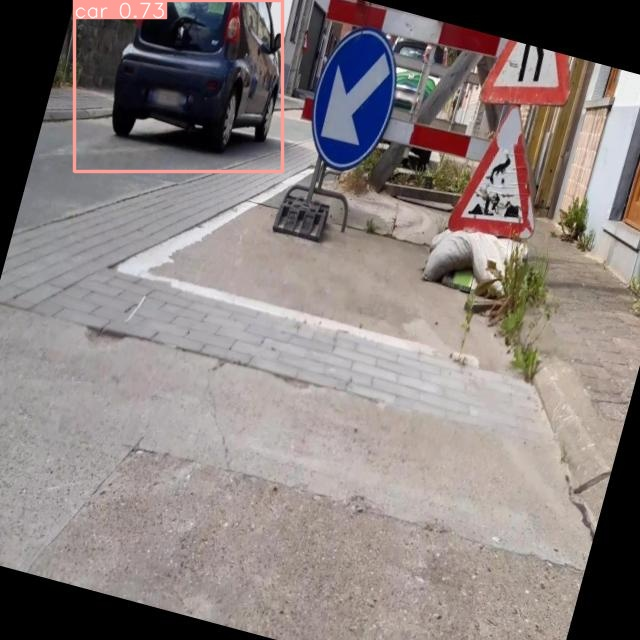

In [ ]:
display(Image('/content/runs/detect/predict/z5433385257716_22576f631975f27d6afee279f431d213_jpg.rf.56178685cf6d6792b80f6b9e625246fe.jpg'))

The second train

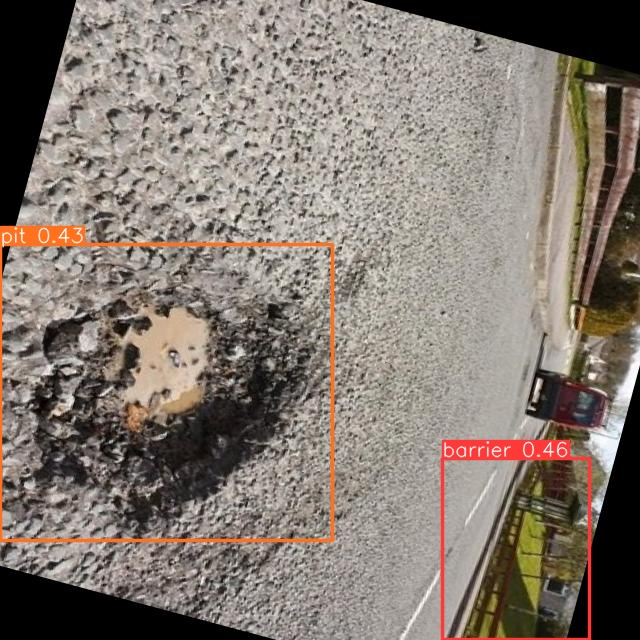

In [ ]:
display(Image('/content/runs/detect/predict2/z5433346600544_cc2bde4c3f39c24e6c750d9b76448100_jpg.rf.d6829aad3eacb5e81456911345e2210b.jpg'))

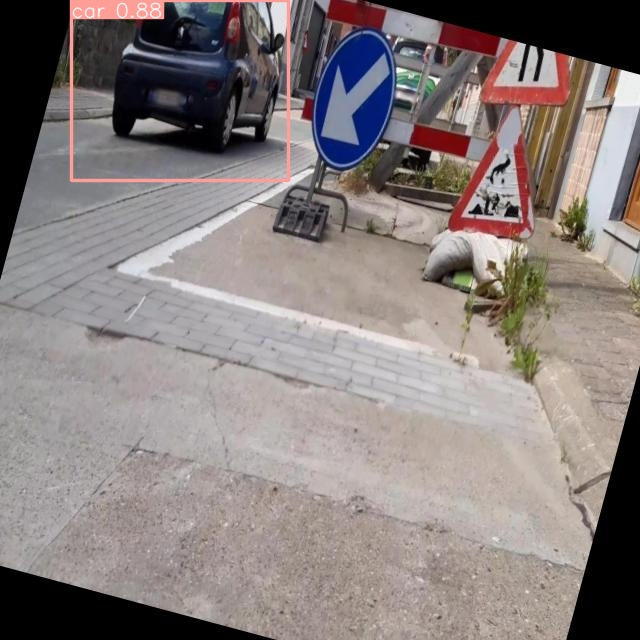

In [ ]:
display(Image('/content/runs/detect/predict2/z5433385257716_22576f631975f27d6afee279f431d213_jpg.rf.56178685cf6d6792b80f6b9e625246fe.jpg'))

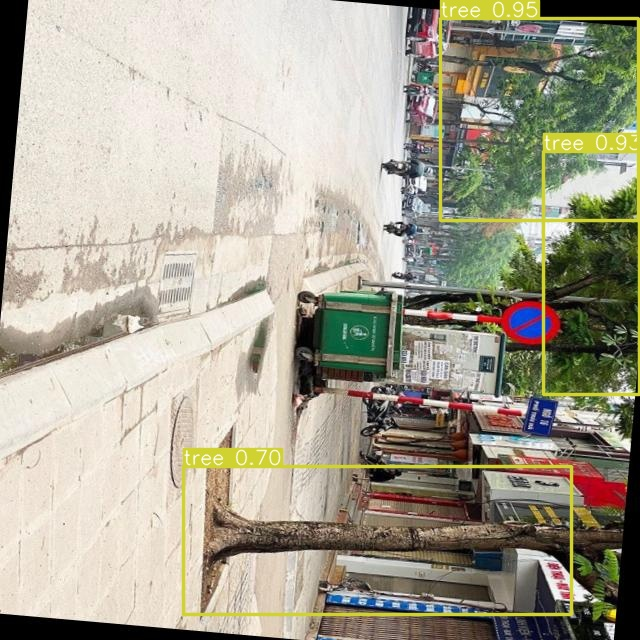

In [ ]:
display(Image("/content/runs/detect/predict2/z5433390017567_cd569f4e9cd6e24cc75ae861ef76d30f_jpg.rf.6ac57f0536a3f3013de2aedaab454eb8.jpg"))

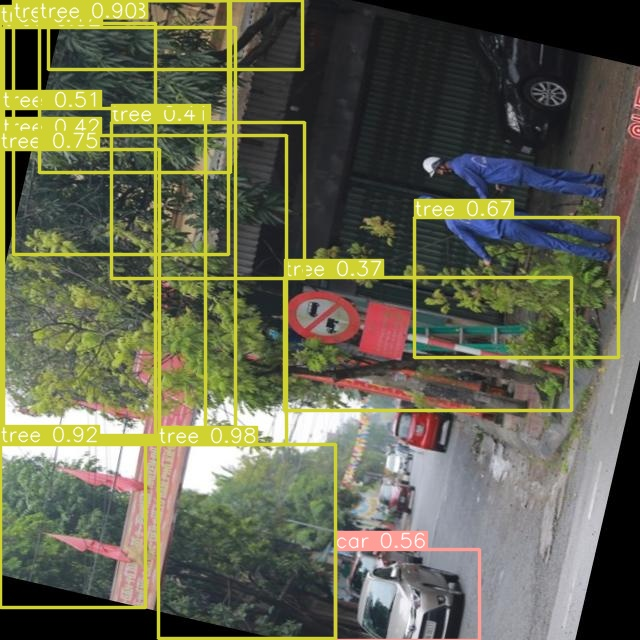

In [ ]:
display(Image("/content/runs/detect/predict2/z5433393759004_9cdfdc64313ec3989b51d33e7b955520-1-_jpg.rf.1447e32eb9072a553833fb7d64611533.jpg"))

In [ ]:
!cp -r /content/runs/detect/predict2 /content/drive/My\ Drive/Colab\ Notebooks/

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" source="/content/road-signs-ireland.jpg"

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" source="/content/test2.jpg"

In [ ]:
display(Image("/content/runs/detect/predict6/road-signs-ireland.jpg"))